# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
#Importando os pacotes necessários

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
#Carregando e visualizando se as variaveis estão de acordo com as recomendações do Sklearn
base_encoded = pd.read_csv('base_encoded.csv')
base_encoded.head()

base_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    6770 non-null   int64  
 1   posse_de_veiculo                        6770 non-null   int64  
 2   posse_de_imovel                         6770 non-null   int64  
 3   qtd_filhos                              6770 non-null   int64  
 4   idade                                   6770 non-null   float64
 5   tempo_emprego                           6770 non-null   float64
 6   possui_celular                          6770 non-null   int64  
 7   possui_fone_comercial                   6770 non-null   int64  
 8   possui_fone                             6770 non-null   int64  
 9   possui_email                            6770 non-null   int64  
 10  qt_pessoas_residencia                   6770 non-null   floa

In [4]:
#Isolando a váriavel resposta

y = base_encoded.mau
y

0       0
1       0
2       0
3       0
4       0
       ..
6765    1
6766    1
6767    1
6768    1
6769    1
Name: mau, Length: 6770, dtype: int64

In [5]:
#Definindo as váriaveis que irão interagir com a váriavel resposta


X = base_encoded.drop('mau', axis=1)
X

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working,educacao_Higher education,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special
0,1,1,1,0,58.832877,3.106849,1,0,0,0,2.0,0,0,0,1,0,0,0,1
1,0,0,1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,0,0,0,0,0,1
2,1,1,1,0,46.224658,2.106849,1,1,1,1,2.0,0,0,0,1,1,0,0,0
3,0,1,0,0,29.230137,3.021918,1,0,0,0,2.0,0,0,0,1,0,1,0,0
4,0,0,1,0,27.482192,4.024658,1,0,1,0,2.0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,0,0,1,1,34.857534,3.101370,1,1,1,0,1.0,0,0,0,1,0,0,0,1
6766,0,0,1,0,54.109589,9.884932,1,0,0,0,2.0,0,0,0,1,0,0,0,1
6767,0,0,1,0,43.389041,7.380822,1,1,1,0,2.0,0,0,0,0,0,0,0,1
6768,1,1,1,0,30.005479,9.800000,1,1,0,0,2.0,0,0,0,1,0,0,0,1


In [43]:
#Separando em 70% para o treino, 30% para o teste


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [7]:
# Definindo um objeto com a função da árvores de decisão.
# 1)

clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [8]:
# Treinando o modelo
# 2)

clf = clf.fit(X_train,y_train)
clf

DecisionTreeClassifier(random_state=100)

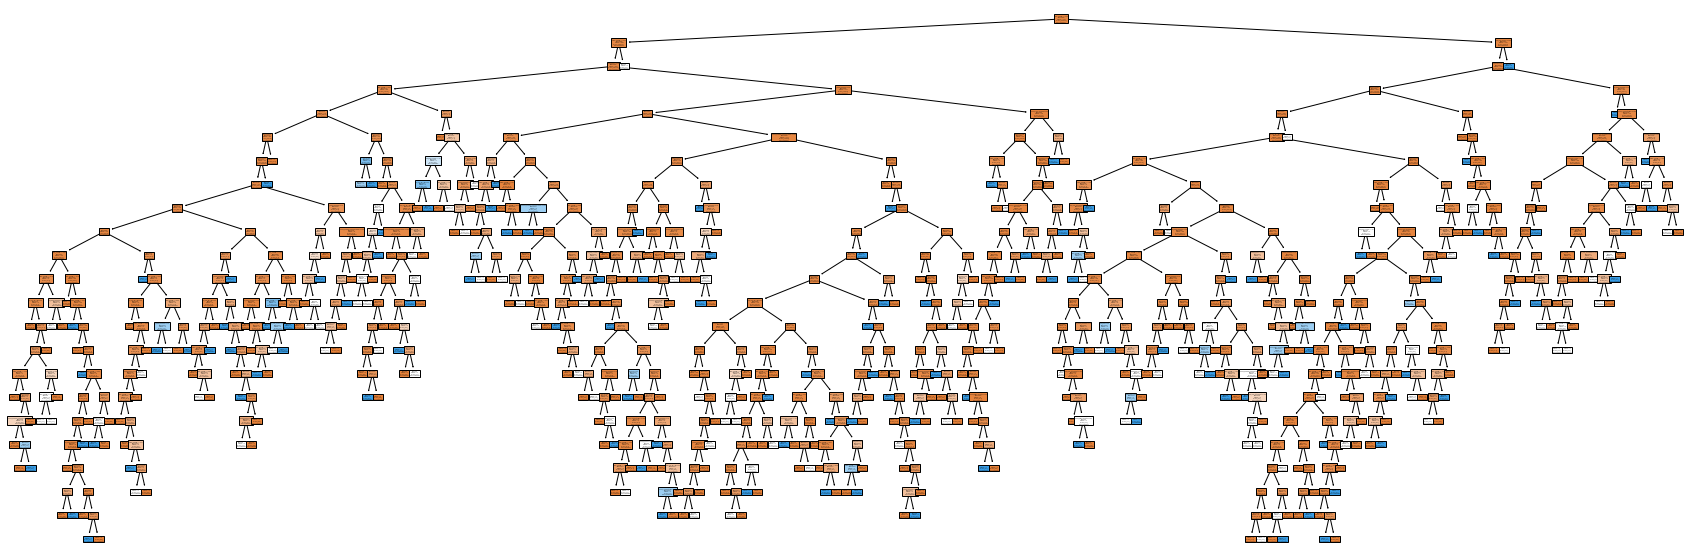

In [9]:
# Visualizando a árvore
# 3)

plt.figure(figsize=(30,10))
plot_tree(clf,
         filled=True,
         class_names=['Aprovados', 'Reprovados'],
         feature_names=X_train.columns);

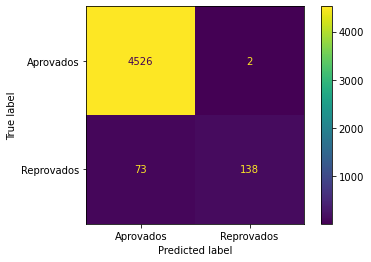

In [10]:
# Visualizando a matrix de classificação
# 4)

plot_confusion_matrix(clf, X_train, y_train, display_labels = ['Aprovados', 'Reprovados'])

In [11]:
# Calculando a acurácia 
# 5)

predict = clf.predict(X_train)

In [12]:
treino = accuracy_score(y_train, predict)
treino

0.9841738763452205

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [16]:
# 1)

clf_dt = DecisionTreeClassifier(random_state=100)
clf_dt

DecisionTreeClassifier(random_state=100)

In [17]:
clf_dt = clf_dt.fit(X_test, y_test)
clf_dt

DecisionTreeClassifier(random_state=100)

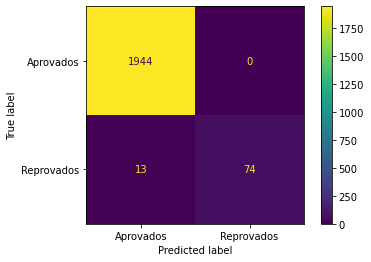

In [18]:
# 2)

plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['Aprovados', 'Reprovados'])

In [19]:
# 3)

predict = clf_dt.predict(X_test)

In [20]:
teste = accuracy_score(y_test, predict)
teste

0.9935992122107337

In [68]:
print(f'A acurácia do treino foi de: {round(treino *100, 2)}%, e a de teste foi de: {round(teste *100, 2)}%')

A acurácia do treino foi de: 98.42%, e a de teste foi de: 99.36%


In [21]:
#4)

clf_min = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_min

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [22]:
clf_min = clf_min.fit(X_test, y_test)

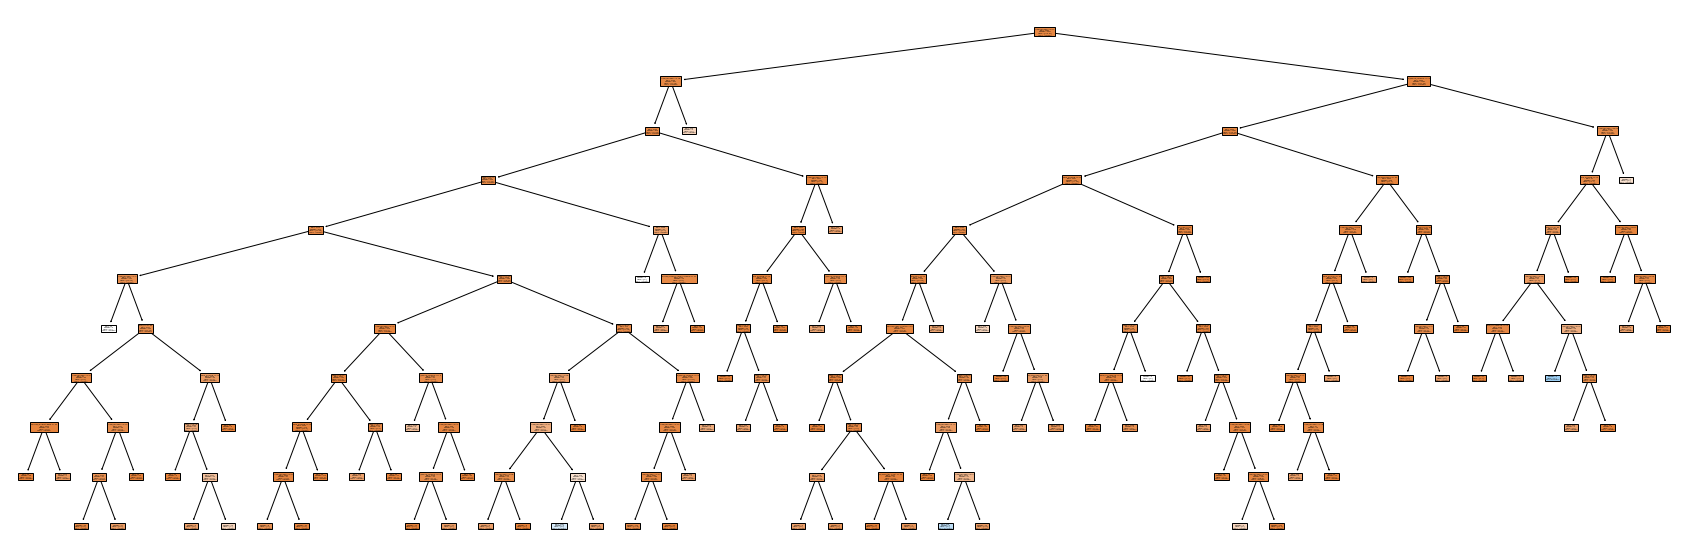

In [23]:
plt.figure(figsize=(30,10))
plot_tree(clf_min,
         filled=True,
         class_names=['Aprovados', 'Reprovados'],
         feature_names=X_test.columns);

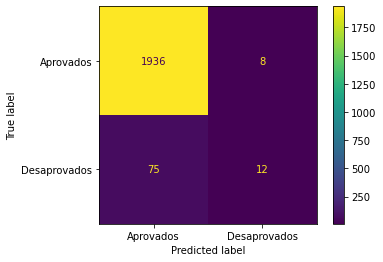

In [24]:
plot_confusion_matrix(clf_min, X_test, y_test, display_labels=['Aprovados', 'Desaprovados'])

In [28]:
predict_min = clf_min.predict(X_test)

In [29]:
accuracy_score(y_test, predict_min)

0.9591334318069916

In [44]:
12 / (1936+75+20) 

0.005908419497784343

In [33]:
# 5)

base_encoded.mau = base_encoded.mau.map({1: 0, 0 : 0})

In [34]:
base_encoded.mau.unique()

array([0], dtype=int64)

In [35]:
y = base_encoded.mau
y

0       0
1       0
2       0
3       0
4       0
       ..
6765    0
6766    0
6767    0
6768    0
6769    0
Name: mau, Length: 6770, dtype: int64

In [37]:
clf_plus = DecisionTreeClassifier(random_state=100)
clf_plus

DecisionTreeClassifier(random_state=100)

In [42]:
clf_plus.fit(X, y)
predict_plus = clf_plus.predict(X)
#plot_confusion_matrix(clf_plus, X, y, display_labels=['Aprovados','Reprovados']);
accuracy_score(y, predict_plus)

1.0